In [41]:
#!pip install pandas-ta
#!pip install plotly==5.3.1
#!pip install dash

In [42]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [53]:
# https://www.cryptodatadownload.com/data/bitstamp
df = pd.read_csv("Bitstamp_BTCUSD_d.csv", sep=',', skiprows=[1])[["unix","open", "high", "low", "close"]]
df.sort_values(by="unix", inplace = True)
df["date"] = pd.to_datetime(df["unix"], unit='s')

In [54]:
# Add rsi to the df
df["rsi"] = ta.rsi(close=df.close, length=10)
# Equivalently
df["rsi"] = df.ta.rsi(length=10)
# Automatically generate a column name and append that onto the df. 
df.ta.rsi(length=10, append=True)
df

,unix,open,high,low,close,date,rsi,RSI_10
2495,1417132800,363.59,381.34,360.57,376.28,2014-11-28,NaN,NaN
2494,1417219200,376.42,386.60,372.25,376.72,2014-11-29,NaN,NaN
2493,1417305600,376.57,381.99,373.32,373.34,2014-11-30,NaN,NaN
2492,1417392000,376.40,382.31,373.03,378.39,2014-12-01,NaN,NaN
2491,1417478400,378.39,382.86,375.23,379.25,2014-12-02,NaN,NaN
...,...,...,...,...,...,...,...,...
4,1632355200,43586.00,45013.17,43105.00,44903.50,2021-09-23,46.497390,46.497390
3,1632441600,44893.70,45159.90,40693.27,42848.50,2021-09-24,40.755059,40.755059
2,1632528000,42835.88,43010.69,41689.60,42722.19,2021-09-25,40.414199,40.414199
1,1632614400,42699.10,43956.38,40808.00,43204.73,2021-09-26,42.457068,42.457068


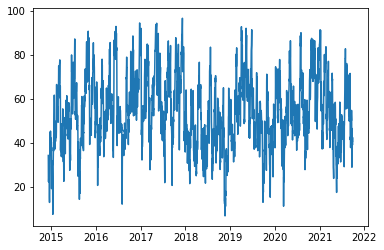

In [55]:
plt.plot(df.date, df.RSI_10)

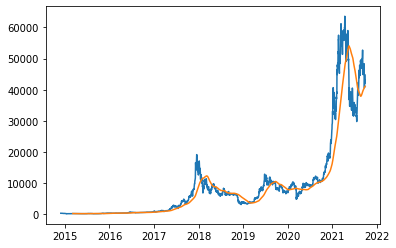

In [46]:
df.ta.sma(length = 100, append = True)
plt.plot(df.date, df.close)
plt.plot(df.date, df.SMA_100)
plt.show()

In [47]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [52]:
# Heikin Ashi candles
hadf = ta.ha(open_=df.open, 
             close=df.close,
             high=df.high,
             low=df.low)
print(hadf)

fig = go.Figure(data=[go.Candlestick(x=df.date,
                                    open=hadf.HA_open,
                                    high=hadf.HA_high,
                                    low=hadf.HA_low,
                                    close=hadf.HA_close)])

fig.show()

           HA_open   HA_high        HA_low    HA_close
2495    377.354540    381.34    360.570000    370.4450
2494    376.711581    386.60    372.250000    377.9975
2493    377.118162    381.99    373.320000    376.3050
2492    376.703823    382.31    373.030000    377.5325
2491    374.475147    382.86    374.475147    378.9325
...            ...       ...           ...         ...
4     40382.388906  45013.17  40382.388906  44151.9175
3     37365.935313  45159.90  37365.935313  43398.8425
2     32167.280625  43010.69  32167.280625  42564.5900
1     21667.508750  43956.38  21667.508750  42667.0525
0       369.935000  44377.70    369.935000  42965.0825

[2496 rows x 4 columns]
